In [140]:
from sympy import *
import pandas as pd
from dtumathtools import*
import uncertainties as unc
import uncertainties.umath as umath
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
init_printing()

# Actual results

In [141]:
# Actual distance travelled by the iOLab
actual_lenghts_1 = [0.60, 0.63, 0.61, 0.61, 0.61]
actual_lenghts_1 = [unc.ufloat(x, 0.05) for x in actual_lenghts_1]
actual_lenghts_2 = [0.52, 0.48, 0.49, 0.45, 0.47]
actual_lenghts_2 = [unc.ufloat(x, 0.05) for x in actual_lenghts_2]
actual_lenghts_3 = [0.41, 0.40, 0.39, 0.40, 0.42]
actual_lenghts_3 = [unc.ufloat(x, 0.05) for x in actual_lenghts_3]
actual_lenghts_all = [actual_lenghts_1, actual_lenghts_2, actual_lenghts_3]

# Fetch the velocity data
actual_v0_1 = [pd.read_csv(f"data/test1run{x}.csv")[" cal[1]"].max() for x in range(1, 6)]
actual_v0_1 = [unc.ufloat(x, 0.2) for x in actual_v0_1]
actual_v0_2 = [pd.read_csv(f"data/test2run{x}.csv")[" cal[1]"].max() for x in range(1, 6)]
actual_v0_2 = [unc.ufloat(x, 0.2) for x in actual_v0_2]
actual_v0_3 = [pd.read_csv(f"data/test3run{x}.csv")[" cal[1]"].max() for x in range(1, 6)]
actual_v0_3 = [unc.ufloat(x, 0.2) for x in actual_v0_3]
actual_v0_all = [actual_v0_1, actual_v0_2, actual_v0_3]

actual_lenghts_all, actual_v0_all

([[0.6+/-0.05, 0.63+/-0.05, 0.61+/-0.05, 0.61+/-0.05, 0.61+/-0.05],
  [0.52+/-0.05, 0.48+/-0.05, 0.49+/-0.05, 0.45+/-0.05, 0.47+/-0.05],
  [0.41+/-0.05, 0.4+/-0.05, 0.39+/-0.05, 0.4+/-0.05, 0.42+/-0.05]],
 [[1.58786+/-0.2, 1.56+/-0.2, 1.57584+/-0.2, 1.54+/-0.2, 1.57526+/-0.2],
  [1.36+/-0.2, 1.36+/-0.2, 1.36+/-0.2, 1.36+/-0.2, 1.38421+/-0.2],
  [1.08+/-0.2, 1.09516+/-0.2, 1.12171+/-0.2, 1.11162+/-0.2, 1.11797+/-0.2]])

# Calculations for expected result

In [142]:
g = unc.ufloat(9.82, 0.01) # m/s^2

# Calculate the angle of the slobe based on height and length of board
h = unc.ufloat(0.198, 0.002) # m
l = unc.ufloat(0.832, 0.002) # m

# We calcualte the angle using uncertainty propagation
angle: unc.ufloat = umath.atan(h/l)
angle

0.2336348502442575+/-0.0023385367802248214

In [143]:
# We know that at the end of the board the iOLab has a velocity of v0
# We also know that it will fall a distance h_floor - h_box
h_floor = unc.ufloat(0.927, 0.003) # m
h_box = unc.ufloat(0.1, 0.02) # m
h_fall = h_floor - h_box

# We calculate the leghts based on the three starting locations
l_iOLab = unc.ufloat(0.124, 0.004) # m
l_normal_board = l - l_iOLab
l_starts = [
    l_normal_board,
    l_normal_board - unc.ufloat(0.181, 0.003),
    l_normal_board - unc.ufloat(0.389, 0.003)]

# We calculate the initial velocity of the iOLab
# using the angle and the length of the board not taking friction into account
v0 = [umath.sqrt(2 * umath.sin(angle) * l_actual * g) for l_actual in l_starts]
v0, l_starts

([1.7942256883654681+/-0.010015760261724554,
  1.547981439196514+/-0.01052027982219166,
  1.204358502400901+/-0.011330790390631767],
 [0.708+/-0.004472135954999579,
  0.5269999999999999+/-0.005385164807134504,
  0.31899999999999995+/-0.005385164807134504])

In [144]:
# We calculate the time it takes for the iOLab to fall into the box
t = umath.sqrt(2 * h_fall / g)
t

0.4104044004321758+/-0.005022435617906163

In [145]:
# We now want to calculate the distance the iOLab will travel in the x direction
# We can do this by using v0, t, and the angle of the board
calculated_lenght = [velocity * t * umath.cos(angle) for velocity in v0]
calculated_lenght

[0.7163522254988847+/-0.009492969167793242,
 0.6180381633090942+/-0.008536131117280566,
 0.4808452465527601+/-0.007346187230035873]

# Plot of data

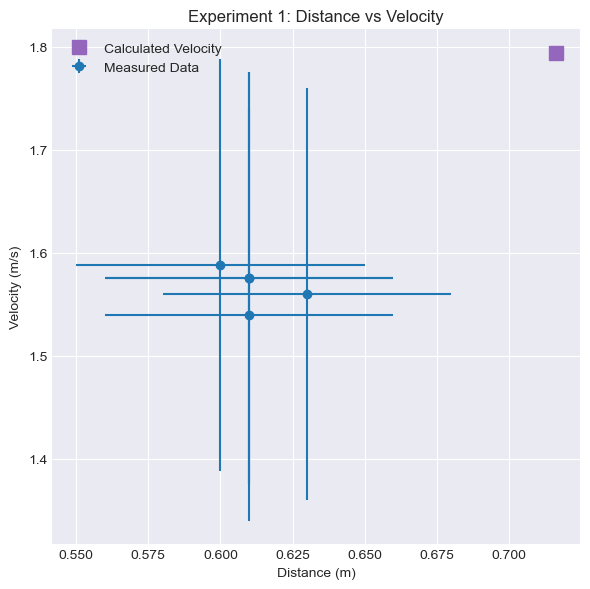

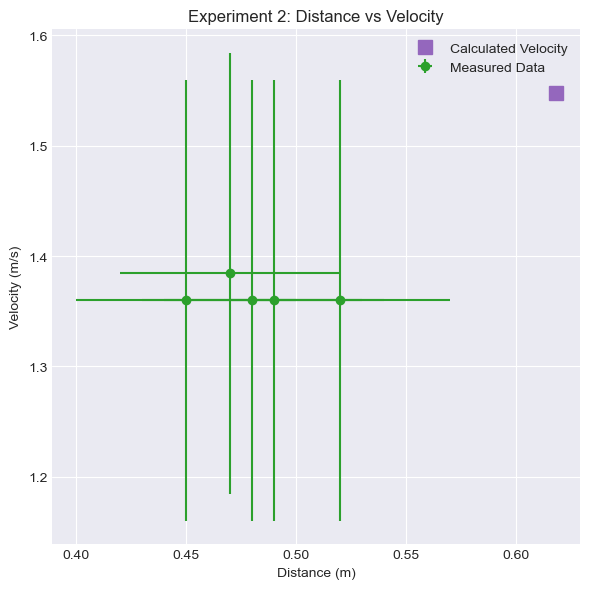

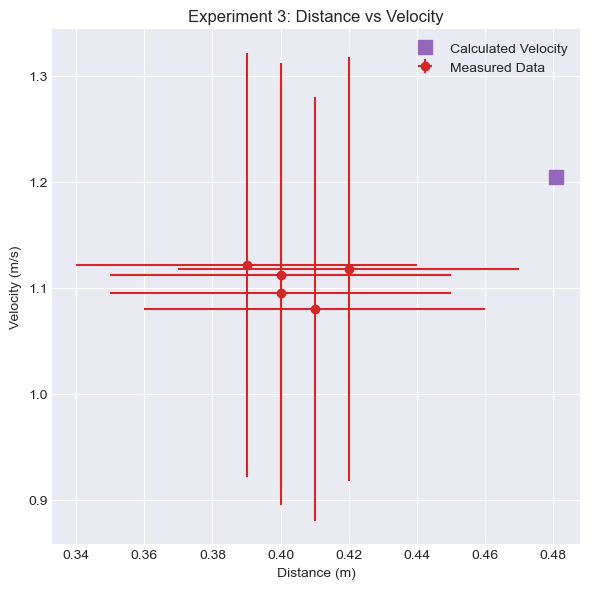

In [146]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

# --------- Plot for Experiment 1 ---------
plt.figure(figsize=(6, 6))
plt.errorbar(
    [x.nominal_value for x in actual_lenghts_1],
    [x.nominal_value for x in actual_v0_1],
    xerr=[x.std_dev for x in actual_lenghts_1],
    yerr=[x.std_dev for x in actual_v0_1],
    fmt='o',
    color='tab:blue',
    label="Measured Data"
)
# Plot the calculated velocity for experiment 1 (matching index 0)
plt.plot(
    calculated_lenght[0].nominal_value, v0[0].nominal_value,
    's', markersize=10, color='tab:purple',
    label="Calculated Velocity"
)
plt.title("Experiment 1: Distance vs Velocity")
plt.xlabel("Distance (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.tight_layout()
plt.show()

# --------- Plot for Experiment 2 ---------
plt.figure(figsize=(6, 6))
plt.errorbar(
    [x.nominal_value for x in actual_lenghts_2],
    [x.nominal_value for x in actual_v0_2],
    xerr=[x.std_dev for x in actual_lenghts_2],
    yerr=[x.std_dev for x in actual_v0_2],
    fmt='o',
    color='tab:green',
    label="Measured Data"
)
# Plot the calculated velocity for experiment 2 (matching index 1)
plt.plot(
    calculated_lenght[1].nominal_value, v0[1].nominal_value,
    's', markersize=10, color='tab:purple',
    label="Calculated Velocity"
)
plt.title("Experiment 2: Distance vs Velocity")
plt.xlabel("Distance (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.tight_layout()
plt.show()

# --------- Plot for Experiment 3 ---------
plt.figure(figsize=(6, 6))
plt.errorbar(
    [x.nominal_value for x in actual_lenghts_3],
    [x.nominal_value for x in actual_v0_3],
    xerr=[x.std_dev for x in actual_lenghts_3],
    yerr=[x.std_dev for x in actual_v0_3],
    fmt='o',
    color='tab:red',
    label="Measured Data"
)
# Plot the calculated velocity for experiment 3 (matching index 2)
plt.plot(
    calculated_lenght[2].nominal_value, v0[2].nominal_value,
    's', markersize=10, color='tab:purple',
    label="Calculated Velocity"
)
plt.title("Experiment 3: Distance vs Velocity")
plt.xlabel("Distance (m)")
plt.ylabel("Velocity (m/s)")
plt.legend()
plt.tight_layout()
plt.show()

In [147]:
# Calculate the standard deviation between calculated distance
# and actual distance of the calculated velocities using std_score
std_scores = []
for i in range(len(calculated_lenght)):
    actual_lenghts = actual_lenghts_all[i]
    std_score_pr_point = [x.std_score(calculated_lenght[i]) for x in actual_lenghts]
    std_scores.append(std_score_pr_point)
std_scores

[[2.3270445099776937+/-0.18985938335586483,
  1.7270445099776932+/-0.18985938335586483,
  2.1270445099776936+/-0.18985938335586483,
  2.1270445099776936+/-0.18985938335586483,
  2.1270445099776936+/-0.18985938335586483],
 [1.9607632661818841+/-0.1707226223456113,
  2.760763266181885+/-0.1707226223456113,
  2.5607632661818847+/-0.1707226223456113,
  3.360763266181884+/-0.1707226223456113,
  2.960763266181885+/-0.1707226223456113],
 [1.4169049310552029+/-0.14692374460071747,
  1.616904931055202+/-0.14692374460071747,
  1.8169049310552021+/-0.14692374460071747,
  1.616904931055202+/-0.14692374460071747,
  1.2169049310552027+/-0.14692374460071747]]

In [148]:
# Calculate the avereage std_score for each experiment
average_std_scores = [sum(x) / len(x) for x in std_scores]
average_std_scores

[2.0870445099776935+/-0.18985938335586486,
 2.7207632661818844+/-0.17072262234561134,
 1.536904931055202+/-0.14692374460071747]

# Regresion analysis

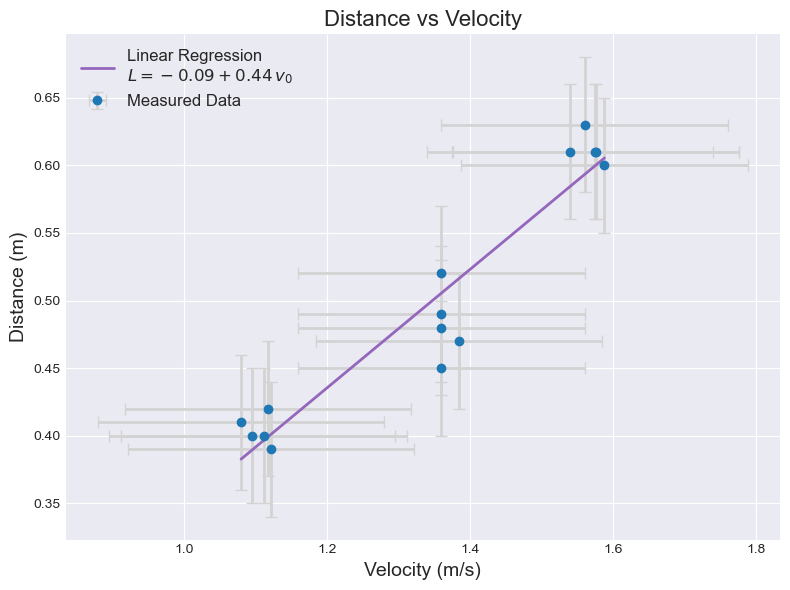

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# --- Combine all experiment data into single lists ---
all_v0 = []
all_length = []
all_v0_err = []
all_length_err = []

for v0_list, length_list in zip(actual_v0_all, actual_lenghts_all):
    for v, L in zip(v0_list, length_list):
        all_v0.append(v.nominal_value)
        all_length.append(L.nominal_value)
        all_v0_err.append(v.std_dev)
        all_length_err.append(L.std_dev)

# --- Define the linear model ---
# Now, we treat velocity as the independent variable (x)
def linear_model(v, A, B):
    return A + B * v

# --- Perform linear regression ---
# x data: velocity, y data: length (with length uncertainties)
param, cov = curve_fit(linear_model, all_v0, all_length, sigma=all_length_err)
A, B = param
A_err, B_err = np.sqrt(np.diag(cov))

# --- Create a smooth line for the regression curve ---
v0_fit = np.linspace(min(all_v0), max(all_v0), 100)
length_fit = linear_model(v0_fit, *param)

# --- Plot the data and the regression curve ---
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(8, 6))
plt.errorbar(all_v0, all_length, xerr=all_v0_err, yerr=all_length_err,
             fmt='o', color='tab:blue', ecolor='lightgray', elinewidth=2,
             capsize=4, label="Measured Data")
plt.plot(v0_fit, length_fit, label=f"Linear Regression\n$L = {A:.2f} + {B:.2f}\,v_0$",
         color='tab:purple', linewidth=2)

plt.title("Distance vs Velocity", fontsize=16)
plt.xlabel("Velocity (m/s)", fontsize=14)
plt.ylabel("Distance (m)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()